In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 讀取銷售數據 (CSV 檔案)，請確認路徑正確
df = pd.read_csv(r"C:\Users\AN515\Desktop\NHW\salesdata.csv")

In [ ]:
# 將數字 1-7 的星期代碼對應到星期名稱
weekday_map = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# 利用 map() 函數，將數字型的 'DayOfWeek' 轉換成字串型的星期名稱
df['Weekday Name'] = df['DayOfWeek'].map(weekday_map)

# 計算每個星期的平均銷售額
# groupby('Weekday Name')：以星期名稱作為分組依據
# ['Sales'].mean()：計算各組的 Sales 平均值
# reindex([...])：按照指定順序（星期一到星期日）重新排列索引，確保結果不會亂序
avg_sales = df.groupby('Weekday Name')['Sales'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
print(avg_sales)

Weekday Name
Monday       55.363811
Tuesday      55.010738
Wednesday    52.607930
Thursday     52.661566
Friday       55.869983
Saturday     67.451834
Sunday       68.815137
Name: Sales, dtype: float64


In [13]:
# 建立線性回歸模型 (y = a*x + b)
linear_model = LinearRegression()
linear_model.fit(df[['DayOfWeek']], df['Sales'])  # 使用 DayOfWeek 當自變數，Sales 當因變數

# 建立多次多項式回歸模型 (y = a*x^3 + b*x^2 + c*x + d)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(df[['DayOfWeek']], df['Sales'])


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [ ]:
# 預測未來一週 (星期一到星期日的銷售額)
# 建立一個新的 DataFrame，DayOfWeek = 1 到 7
# 這裡相當於建立一份「模擬用的輸入資料」，要丟進模型做預測
future_days = pd.DataFrame({'DayOfWeek': range(1, 8)})
future_days['Weekday Name'] = future_days['DayOfWeek'].map(weekday_map)

# 線性回歸模型的預測值
# 使用剛剛訓練好的 linear_model，對 1~7 這些 DayOfWeek 做預測
# predict() 輸入必須是 DataFrame 或 2D 陣列，所以這裡要用雙中括號 [['DayOfWeek']]
future_days['Linear Predicted'] = linear_model.predict(future_days[['DayOfWeek']])

# 多項式回歸 (三次) 的預測值
future_days['Polynomial Predicted'] = poly_model.predict(future_days[['DayOfWeek']])

# 實際平均值 (計算自資料)
future_days['Actual Average'] = avg_sales.values
print(future_days)


   DayOfWeek Weekday Name  Linear Predicted  Polynomial Predicted  \
0          1       Monday         50.954700             56.322022   
1          2      Tuesday         53.391980             52.982884   
2          3    Wednesday         55.829261             52.405417   
3          4     Thursday         58.266541             54.217386   
4          5       Friday         60.703822             58.046561   
5          6     Saturday         63.141102             63.520707   
6          7       Sunday         65.578383             70.267594   

   Actual Average  
0       55.363811  
1       55.010738  
2       52.607930  
3       52.661566  
4       55.869983  
5       67.451834  
6       68.815137  


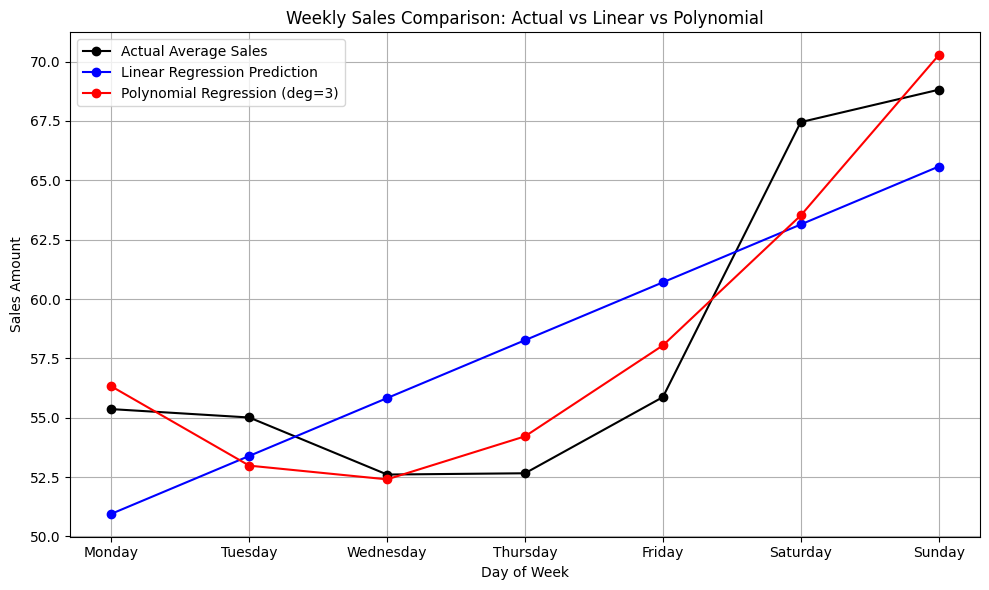

In [ ]:
# 畫圖比較實際平均與兩種模型的預測
plt.figure(figsize=(10, 6))

# 黑色線: 實際平均銷售額
plt.plot(future_days['Weekday Name'], future_days['Actual Average'],  marker='o', label='Actual Average Sales', color='black')

# 藍色線: 線性回歸預測
plt.plot(future_days['Weekday Name'], future_days['Linear Predicted'],  marker='o', label='Linear Regression Prediction', color='blue')

# 紅色線: 三次多項式回歸預測
plt.plot(future_days['Weekday Name'], future_days['Polynomial Predicted'],  marker='o', label='Polynomial Regression (deg=3)', color='red')

# 設定圖表標題與標籤
plt.title('Weekly Sales Comparison: Actual vs Linear vs Polynomial')
plt.xlabel('Day of Week')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()